# Part 1
---
## Section 1: Introduction, Data Analysis and visualization
---
### Introduction
Part one of the this project starts of by cleaning the dataset aquired from 'inside airbnb', removing uninteresting or unusable columns and values and creating a visual representation of the data to get a grasp of what the data looks like and what it might indicate. After the data is visualized, both binary and multi class classification is implemented, applying the three methods: *Logisitc Regression*, *Support Vector Machines* and *Random Forrest classifiers*.

Part two consists of an exploritory component. Data consisting of locations of the top ten city attractions, metrostations and distance to city center are used to try to enhance classifications, and make better predictions. In addition to this the data is clustered and interperated to see what features are the most important. 




___

### Data overview

Loading the dataset and necessary imports.

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

airbnb_uc=pd.read_csv("data/listings_CPH.csv")

airbnb_uc.head()

id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name  neighbourhood_group              neighbourhood   latitude  \
0     Simon                  NaN                    Nrrebro  55.686410   
1      Kari                  NaN                   Indre By  55.693070   
2     Julia                  NaN                   Indre By  55.676020   
3      Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4      Ebbe                  NaN  Vesterbro-Kongens Enghave  55.666602   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  12.547410  Entire home/apt    898               3                172   
1  12.576490  Entire home/apt   2600               4                 59   
2  12.575400  Entire home/apt   3250               3                300   
3  12.555040  Entire home/apt    725               7                 24   
4  12.555283  Entire home/apt   1954               3                 19   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-06-21               1.08                               1   
1  2022-08-09               0.55                               1   
2  2022-09-10               2.06                               3   
3  2022-08-04               0.16                               1   
4  2022-08-22               0.13                               1   

   availability_365  number_of_reviews_ltm  license  
0                 0                      4      NaN  
1               303                      8      NaN  
2                56                      7      NaN  
3                59                      2      NaN  
4                 0                      2      NaN

In [261]:
airbnb_uc.describe()

id       host_id  neighbourhood_group      latitude  \
count  1.381500e+04  1.381500e+04                  0.0  13815.000000   
mean   1.719385e+17  1.064145e+08                  NaN     55.680569   
std    2.852538e+17  1.302801e+08                  NaN      0.021088   
min    6.983000e+03  1.171800e+04                  NaN     55.609510   
25%    1.907962e+07  1.356383e+07                  NaN     55.666110   
50%    3.931542e+07  4.656301e+07                  NaN     55.681190   
75%    5.665348e+17  1.553486e+08                  NaN     55.695770   
max    7.222925e+17  4.805803e+08                  NaN     55.742800   

          longitude         price  minimum_nights  number_of_reviews  \
count  13815.000000  13815.000000    13815.000000       13815.000000   
mean      12.557805   1205.878972        4.605574          18.571118   
std        0.033512   1433.143149       16.900153          36.402671   
min       12.435670      0.000000        1.000000           0.000000   
25%       12.540285    729.000000        2.000000           2.000000   
50%       12.555520    995.000000        3.000000           7.000000   
75%       12.580741   1368.500000        4.000000          20.000000   
max       12.651740  64900.000000     1111.000000         711.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       12170.000000                    13815.000000      13815.000000   
mean            0.903816                        4.400651         93.302642   
std             1.110754                       21.298565        123.161958   
min             0.010000                        1.000000          0.000000   
25%             0.230000                        1.000000          0.000000   
50%             0.530000                        1.000000         20.000000   
75%             1.120000                        1.000000        174.000000   
max            24.020000                      179.000000        365.000000   

       number_of_reviews_ltm  license  
count           13815.000000      0.0  
mean                5.451104      NaN  
std                11.373977      NaN  
min                 0.000000      NaN  
25%                 0.000000      NaN  
50%                 3.000000      NaN  
75%                 6.000000      NaN  
max               471.000000      NaN

Checking for null values in each column.

In [262]:
airbnb_uc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               13815
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        1645
reviews_per_month                  1645
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13815
dtype: int64

Removing columns containing non-relevant data and replacing the null values in reviews per month with zero.

In [263]:
airbnb_uc.drop(columns=["id", "name","host_id", "neighbourhood_group","license","host_name","last_review"], inplace=True, axis=1)
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)

### Data analysis and visualization

---

#### Correlation

Seeing if there is any correlation between the numerical values in the data set.

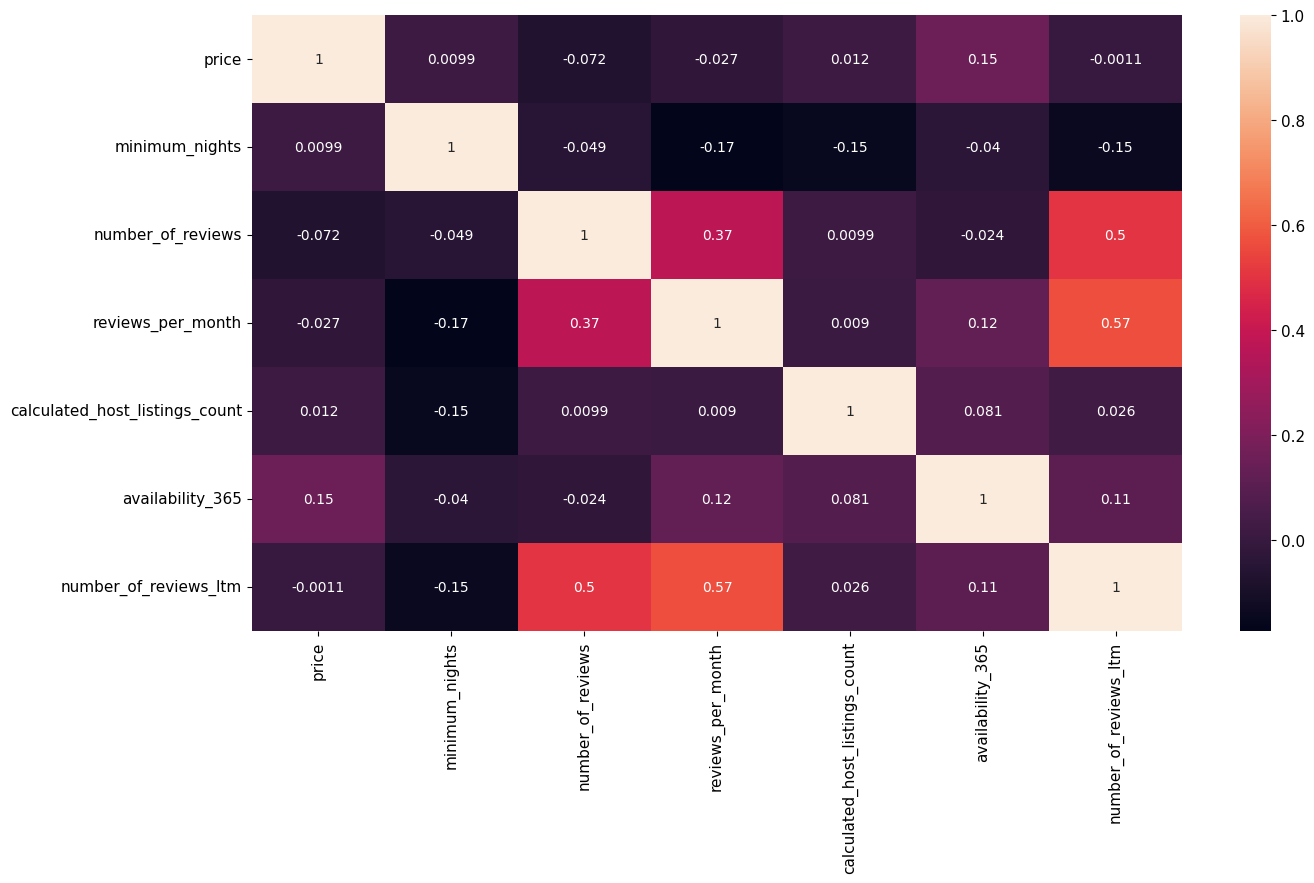

In [264]:
data=airbnb_uc[['price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(method="kendall"), annot=True, annot_kws={"size":10})
plt.show()

The only columns showing signs of correlation is the columns displaying information regarding number of reviews. Apart from these, correlations are very low. 


#### Checking for outliers and preparing data set

Seeing if our data contains wrongful information or irregularities using boxplot for all numerical variables. Note that it is the logarithm along the x-axis.

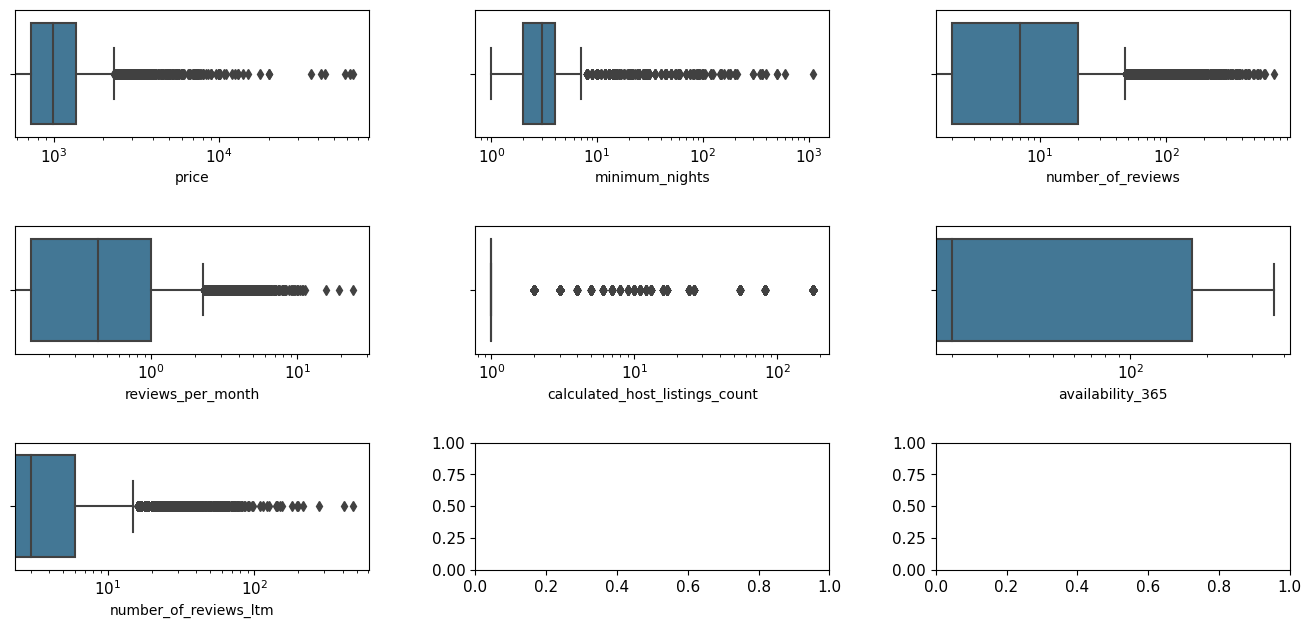

In [265]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3,3, figsize=(15,7))
plt.subplots_adjust(left=0.05 , bottom=0.1, right=0.9 , top=0.9, wspace=0.3, hspace=0.7)

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")
ax4.set_xscale("log")
ax5.set_xscale("log")
ax6.set_xscale("log")
ax7.set_xscale("log")



sns.boxplot(data=airbnb_uc, x='price',
            palette='mako',ax=ax1)
sns.boxplot(data=airbnb_uc,x='minimum_nights',
            palette='mako',ax=ax2)
sns.boxplot(data=airbnb_uc, x='number_of_reviews',
            palette='mako',ax=ax3)
sns.boxplot(data=airbnb_uc, x='reviews_per_month',
            palette='mako',ax=ax4)
sns.boxplot(data=airbnb_uc,x='calculated_host_listings_count',
            palette='mako',ax=ax5)
sns.boxplot(data=airbnb_uc, x='availability_365',
            palette='mako',ax=ax6)
sns.boxplot(data=airbnb_uc, x='number_of_reviews_ltm',
            palette='mako',ax=ax7)

plt.show()

From plot above it can be seen that columns for price and minimum nights are containing a substantial amount of outliers. These will have to be removed.

#### Price

When manually searching the internet for airbnbs in Copenhagen, it can be seen that the max price lays around 5000-5500kr at the time of writing. From this information we see it as unlikely that the prices in our data set that are much higher is non-outliers. From this, as well as examining the data further, we set the max price threshold at 7430, and classify all listings with prices above this as outliers. 

44


<AxesSubplot: xlabel='price'>

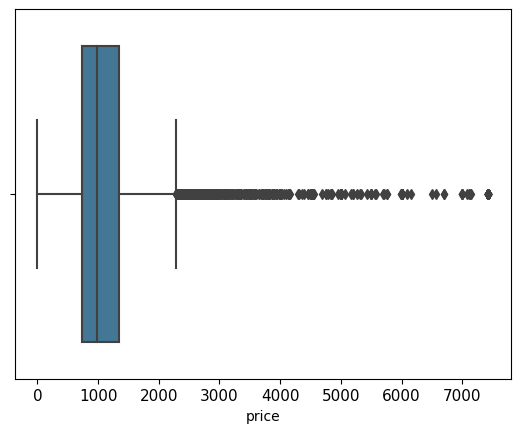

In [266]:
airbnb_clean = airbnb_uc.loc[airbnb_uc['price'] <= 7430]
print(len(airbnb_uc.loc[airbnb_uc['price'] >= 7430]))


sns.boxplot(data=airbnb_clean, x='price',
            palette='mako')

By setting price cap as 7430, 44 columns were removed. The maximum price for a airbnb in the dataset is now 7430. As seen from boxplot the distribution is now more even. The x-axis is not not the logarithm.

#### Minimum nights

For minimum nights, we assume that all values above 60 is outliers as a value of above 60 minimum nights is seen as unlikely.

65


<AxesSubplot: xlabel='minimum_nights'>

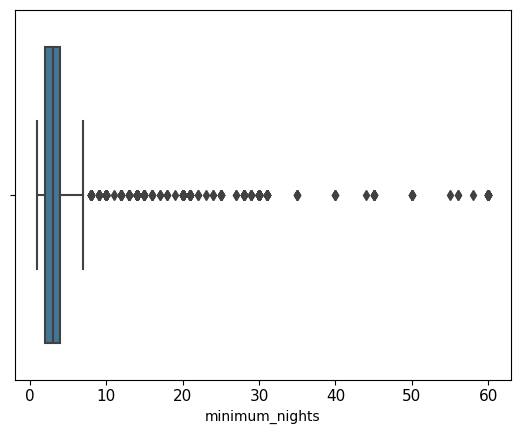

In [267]:
airbnb_clean = airbnb_clean.loc[airbnb_clean['minimum_nights'] <= 60]
print(len(airbnb_uc.loc[airbnb_uc['minimum_nights'] > 60]))

sns.boxplot(data=airbnb_clean, x='minimum_nights',
            palette='mako')

Setting cap for minimum nights as 60, 65 columns were removed.

#### Availibility_365

In [268]:
len(airbnb_clean.loc[(airbnb_clean['availability_365'] == 0)])

4820

For availibility_365 it can be seen that a lot of the values (4745) of the values is zero, which means they are set as fully booked the following year. This may be wrongful information, but as they may be representative we will not remove them. 

### Distribution of values
Now that we have cleaned our dataset for outliers, we can visualize the columns of our data as a histogram.

<Figure size 2000x2000 with 0 Axes>

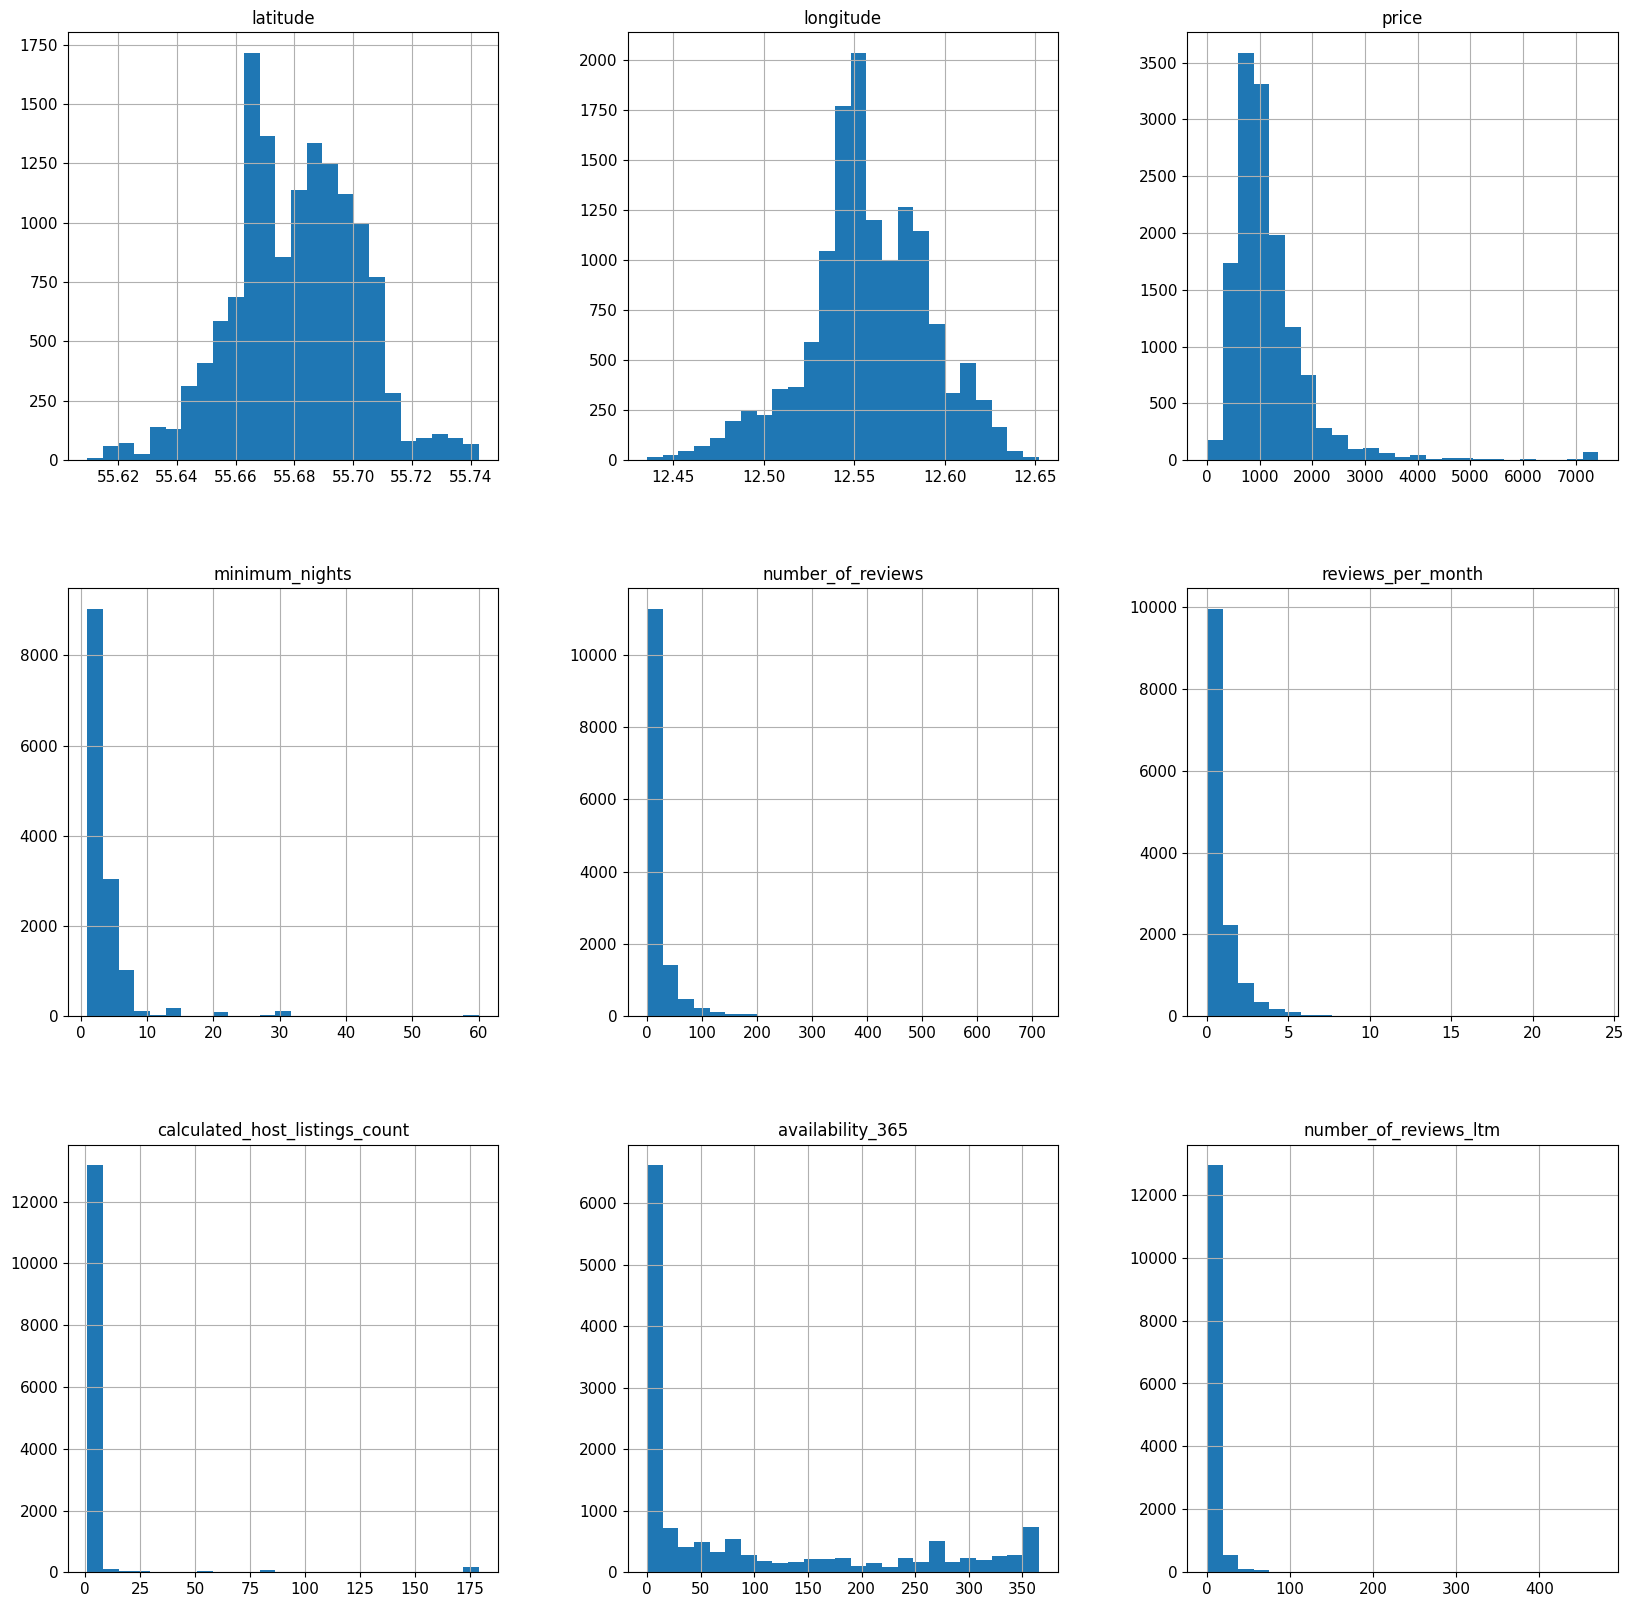

In [269]:
plt.figure(figsize=(20,20))
airbnb_clean.hist(figsize=(20,20), bins=25)
plt.show()

As seen, the values are skewed and does not follow normal distributions.

### Neighbourhood listings and prices
Making a plot of the Airbnb locations colour coded by price, to see if location is a plays a role in price differences.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


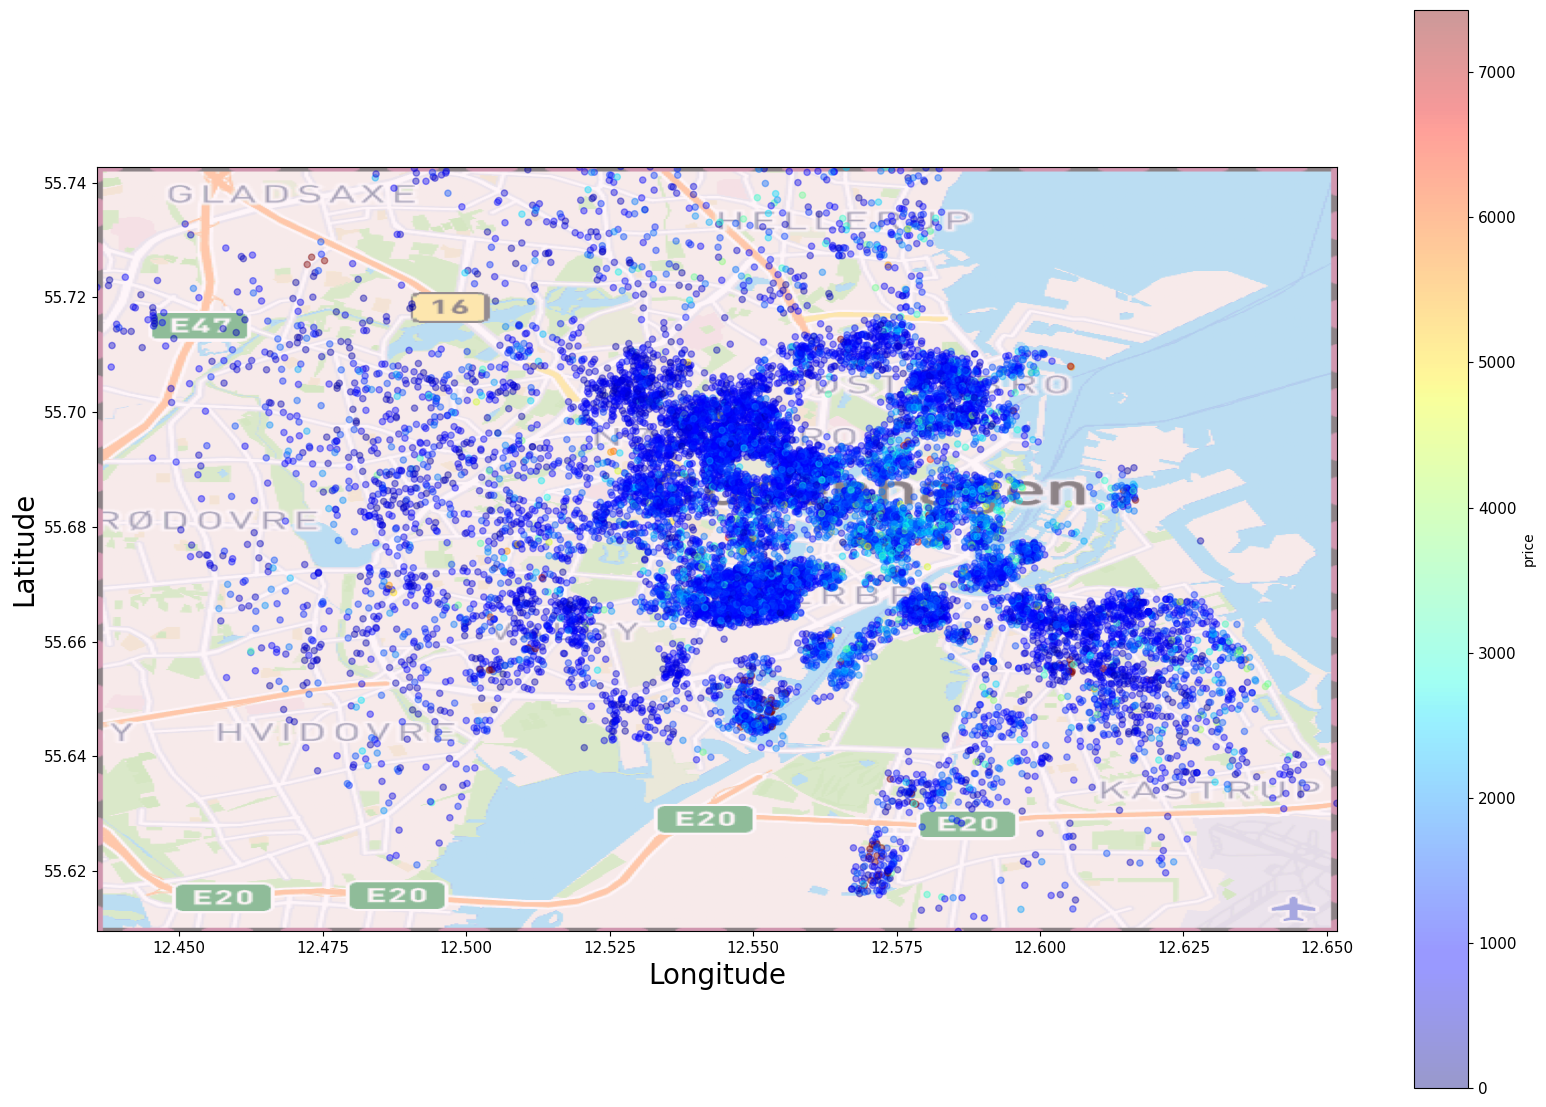

In [270]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
copenhagen_img = mpimg.imread('København2.png')
airbnb_clean.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),c="price", cmap=plt.get_cmap("jet"),
                 colorbar=True, alpha=0.4)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
plt.ylim(55.609510, 55.742800)
plt.xlim(12.435670, 12.651740)
plt.show()

From plot it seems like the Airbnb rentals near the city center is valued higher.

Text(0, 0.5, 'Neighbourhood')

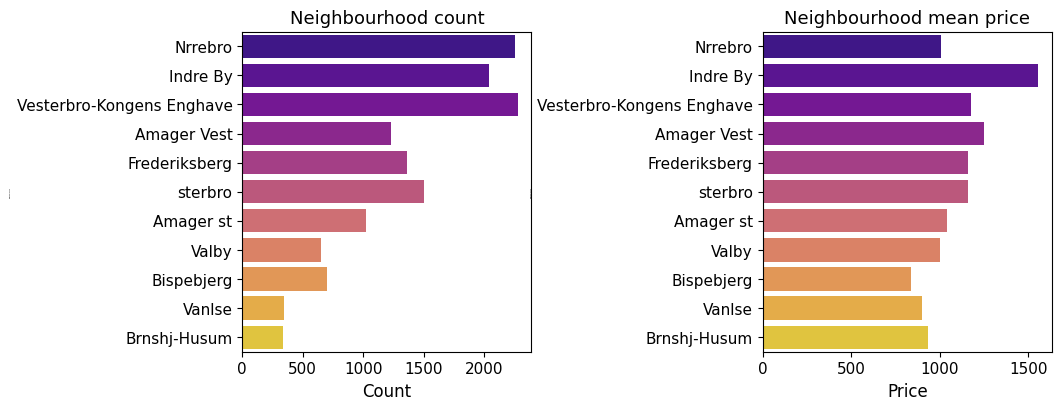

In [271]:
airbnb_clean.groupby("neighbourhood", as_index=False)['price'].mean()

plt.rc('xtick', labelsize=11)       
plt.rc('ytick', labelsize=11)       

fig, axes = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(left=0.0005 , bottom=0.1, right=0.9 , top=0.9, wspace=0.8, hspace=0.2)

ax1 = sns.countplot(y=airbnb_clean["neighbourhood"], palette="plasma", ax=axes[0])
axes[0].set_title("Neighbourhood count", fontsize=13)
ax1.set_xlabel("Count", fontsize = 12)
ax1.set_ylabel("Neighbourhood", fontsize = 0)


ax2=sns.barplot(data=airbnb_clean, x="price", y="neighbourhood", ci=False, palette="plasma", ax=axes[1])
axes[1].set_title("Neighbourhood mean price", fontsize=13)
ax2.set_xlabel("Price", fontsize = 12)
ax2.set_ylabel("Neighbourhood", fontsize = 0)

As seen from plot above, most of the airbnb rentals are in Indre by, Nørrebro and Vesterbro-Kongens Enghave which is located near the city center. Indre By is where the prices are averagely the highest, with Amager Vest coming second. 

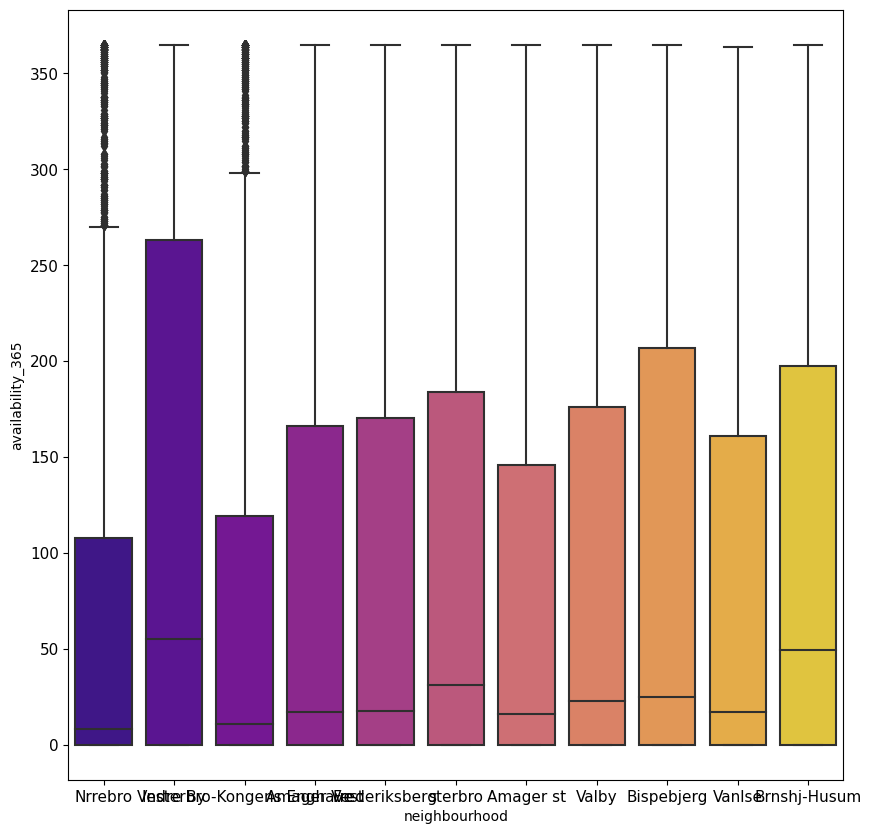

In [272]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb_clean, x='neighbourhood',y='availability_365',palette='plasma')
plt.rc('xtick', labelsize=4)       
plt.rc('ytick', labelsize=8)
plt.show()

Comparing neighbourshoods with availibility_365, it can be seen that Indre by has the highest amount of availible days in a year as well.

### Room type listings and prices
Checking if location has any impact on the room type.

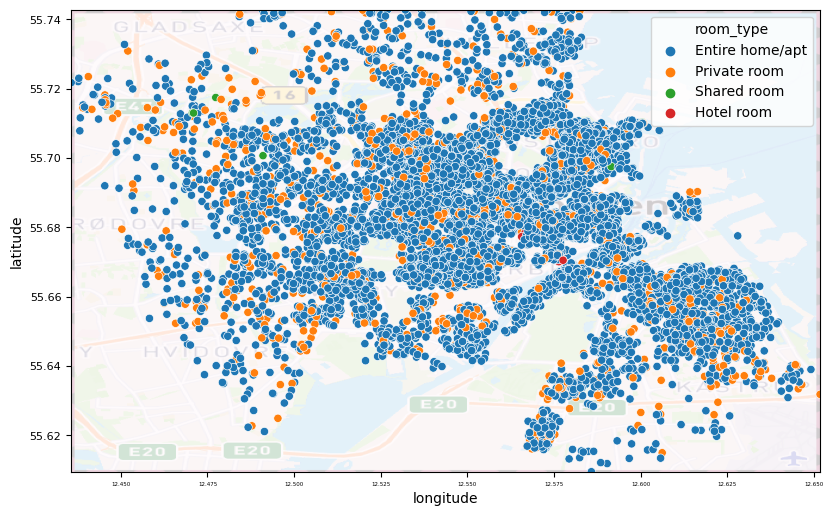

In [273]:
copenhagen_img = mpimg.imread('København2.png')
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb_clean.longitude, y=airbnb_clean.latitude, hue = airbnb_clean.room_type)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.2)
plt.ioff()
plt.show()

Seems like the room types are pretty evenly distributed.

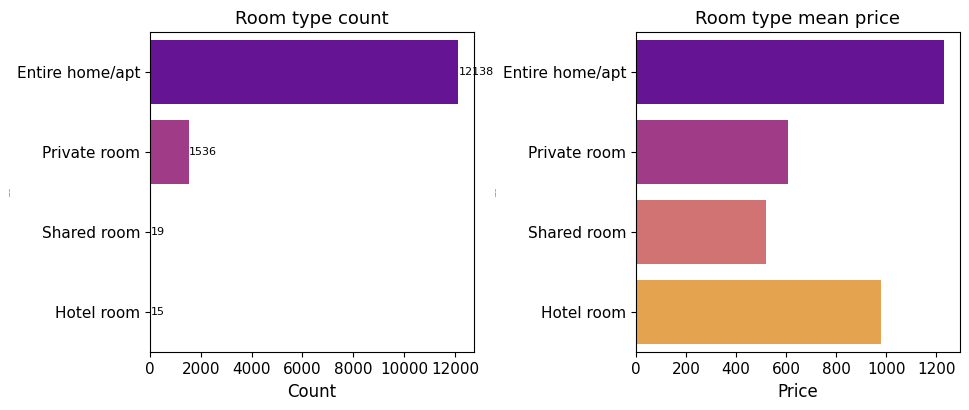

In [274]:
airbnb_clean.groupby("room_type", as_index=False)['price'].mean()

plt.rc('xtick', labelsize=11)       
plt.rc('ytick', labelsize=11)

fig, axes = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(left=0.0005 , bottom=0.1, right=0.9 , top=0.9, wspace=0.5, hspace=0.2)

ax1 = sns.countplot(y=airbnb_clean["room_type"],palette="plasma", ax=axes[0])
axes[0].set_title("Room type count", fontsize=13)
ax1.bar_label(ax1.containers[0], fontsize=8)
ax1.set_xlabel("Count", fontsize = 12)
ax1.set_ylabel("Room type", fontsize = 0)



ax2=sns.barplot(data=airbnb_clean, x="price", y="room_type", ci=False, palette="plasma", ax=axes[1])
axes[1].set_title("Room type mean price", fontsize=13)
ax2.set_xlabel("Price", fontsize = 12)
ax2.set_ylabel("Room type", fontsize = 0)

plt.show()

Entire rooms and apartements has the highest mean price, altough it must be noted that almost all of the listings is in this category. 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


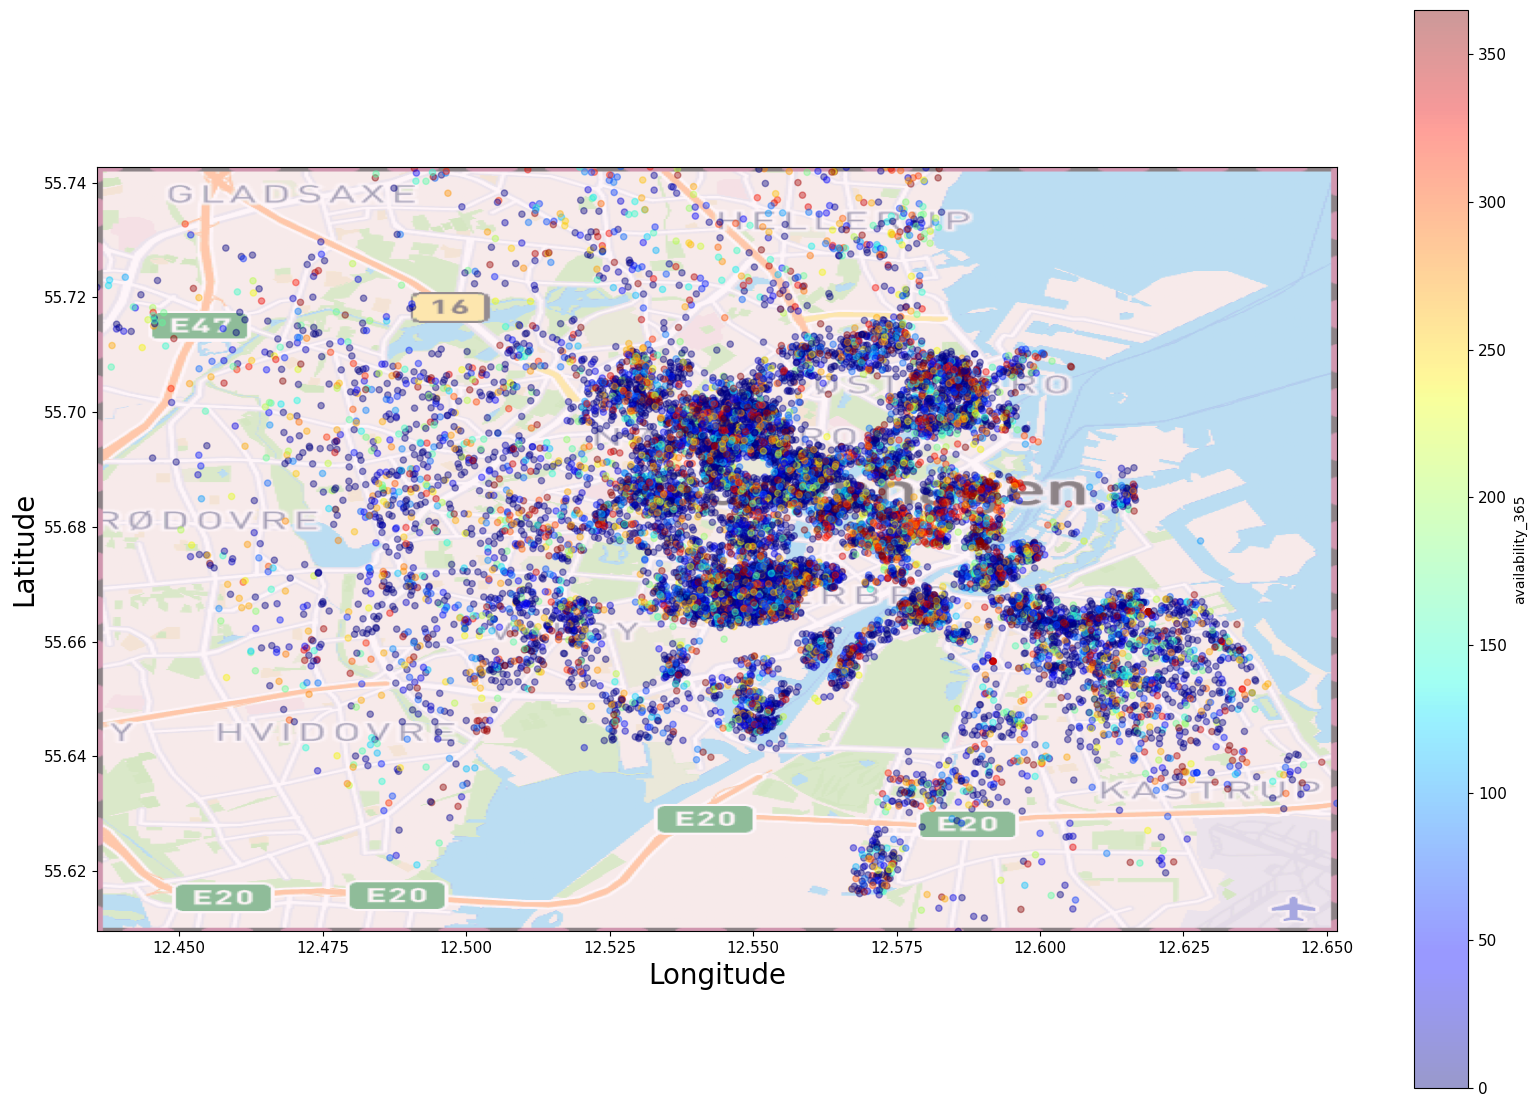

In [275]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
copenhagen_img = mpimg.imread('København2.png')
airbnb_clean.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),c="availability_365", cmap=plt.get_cmap("jet"),
                 colorbar=True, alpha=0.4)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
plt.ylim(55.609510, 55.742800)
plt.xlim(12.435670, 12.651740)
plt.show()

Room type plotted against availibility in a year gives no clear indications.

### Cleaning data set for further analysis
#### Normalizing numerical values
We choose to normalize our numerical values instead of standardizing them because, as seen in previous histogram, the data does not follow a normal distribution. We normalize the numerical variables of the dataset with values from 0 to 1.

In [276]:
def normalizing(column):
    new_column = (column - column.min()) / (column.max() - column.min())
    return new_column

airbnb_clean['minimum_nights'] = normalizing(airbnb_clean['minimum_nights'])
airbnb_clean['number_of_reviews'] = normalizing(airbnb_clean['number_of_reviews'])
airbnb_clean['reviews_per_month'] = normalizing(airbnb_clean['reviews_per_month'])
airbnb_clean['calculated_host_listings_count'] = normalizing(airbnb_clean['calculated_host_listings_count'])
airbnb_clean['availability_365'] = normalizing(airbnb_clean['availability_365'])
airbnb_clean['number_of_reviews_ltm'] = normalizing(airbnb_clean['number_of_reviews_ltm'])

#### Creating dummy variables
(for categorical variables neighbourhood and room type)

In [277]:
neighbourhood = pd.get_dummies(airbnb_clean['neighbourhood'].str.lower().str.replace(' ', '_'))
airbnb_clean = pd.merge(airbnb_clean, neighbourhood, left_index=True, right_index=True)
airbnb_clean = airbnb_clean.drop('neighbourhood', 1)

room_type = pd.get_dummies(airbnb_clean['room_type'])
airbnb = pd.merge(airbnb_clean, room_type, left_index=True, right_index=True)
airbnb = airbnb.drop('room_type', 1)

airbnb.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  55.686410  12.547410    898        0.033898           0.241913   
1  55.693070  12.576490   2600        0.050847           0.082982   
2  55.676020  12.575400   3250        0.033898           0.421941   
3  55.670230  12.555040    725        0.101695           0.033755   
4  55.666602  12.555283   1954        0.033898           0.026723   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0           0.044963                        0.000000          0.000000   
1           0.022898                        0.000000          0.830137   
2           0.085762                        0.011236          0.153425   
3           0.006661                        0.000000          0.161644   
4           0.005412                        0.000000          0.000000   

   number_of_reviews_ltm  amager_st  ...  indre_by  nrrebro  sterbro  valby  \
0               0.008493          0  ...         0        1        0      0   
1               0.016985          0  ...         1        0        0      0   
2               0.014862          0  ...         1        0        0      0   
3               0.004246          0  ...         0        0        0      0   
4               0.004246          0  ...         0        0        0      0   

   vanlse  vesterbro-kongens_enghave  Entire home/apt  Hotel room  \
0       0                          0                1           0   
1       0                          0                1           0   
2       0                          0                1           0   
3       0                          1                1           0   
4       0                          1                1           0   

   Private room  Shared room  
0             0            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  

[5 rows x 24 columns]

---

## Section 2: Prediction challenge

### Target variable for binary Classifier

Firstly, we want to make a binary classifier. We therefore need reduce the different prices to a categorical binary target variable. We 
will use the categories ‘low’ and 'high' as the target variable. To separate the data we need to define a threshold, where observations with a 
rental price below the threshold will be categorized as 'low', and observations with rental price above the threshold will be categorized as
'high'. We will here take a look at both the median and the mean.

In [278]:
df = airbnb
median=df.price.median()
mean=df.price.mean()
print(median)

994.5


In [279]:
print('number of houses with pricing over the mean', len(df[df.price>mean]))
print('number of houses with pricing below the mean', len(df[df.price<mean]))
print('number of houses with pricing over the median', len(df[df.price>median]))
print('number of houses with pricing below the median', len(df[df.price<median]))

number of houses with pricing over the mean 4965
number of houses with pricing below the mean 8743
number of houses with pricing over the median 6854
number of houses with pricing below the median 6854


We can see that the median splits the observations more evenly than using the mean. 
We will therefore use the median as threshold, to gain a more balanced dataset.

In [280]:
df['high']=df['price'].apply(lambda x: x>median)
df.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  55.686410  12.547410    898        0.033898           0.241913   
1  55.693070  12.576490   2600        0.050847           0.082982   
2  55.676020  12.575400   3250        0.033898           0.421941   
3  55.670230  12.555040    725        0.101695           0.033755   
4  55.666602  12.555283   1954        0.033898           0.026723   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0           0.044963                        0.000000          0.000000   
1           0.022898                        0.000000          0.830137   
2           0.085762                        0.011236          0.153425   
3           0.006661                        0.000000          0.161644   
4           0.005412                        0.000000          0.000000   

   number_of_reviews_ltm  amager_st  ...  nrrebro  sterbro  valby  vanlse  \
0               0.008493          0  ...        1        0      0       0   
1               0.016985          0  ...        0        0      0       0   
2               0.014862          0  ...        0        0      0       0   
3               0.004246          0  ...        0        0      0       0   
4               0.004246          0  ...        0        0      0       0   

   vesterbro-kongens_enghave  Entire home/apt  Hotel room  Private room  \
0                          0                1           0             0   
1                          0                1           0             0   
2                          0                1           0             0   
3                          1                1           0             0   
4                          1                1           0             0   

   Shared room   high  
0            0  False  
1            0   True  
2            0   True  
3            0  False  
4            0   True  

[5 rows x 25 columns]

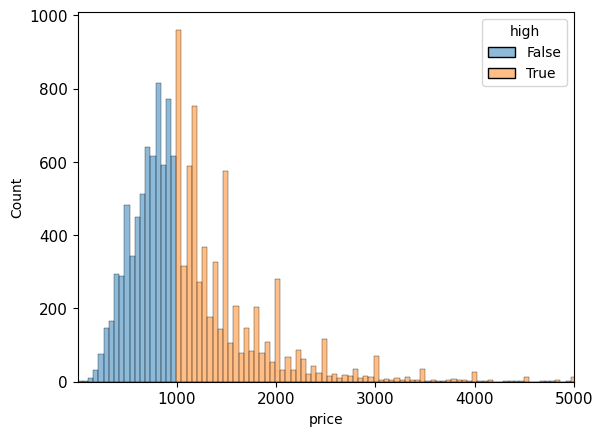

In [281]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="price", hue="high")
ax.set_xlim(1,5000)
plt.show()

### Target variable for multi class classification 
For the multi class classification, se will again need to reduce the the price down to a categorical attribute with 3 values: 'low', 'med', 'high'.
We will split the observations using the percentiles as threshold. This gives us a balanced dataset, which will make it easier to evaluate the results.

In [282]:

mediumPerc=np.percentile(df['price'], 33)
highPerc=np.percentile(df['price'], 66)
print(highPerc)
print(mediumPerc)

1200.0
800.0


'Low’ means that the price of the rental is lower than the 33th percentile of prices in the city,‘medium’ means that the price is between the 33th and 66th percentile, and ‘high’ that the price higher than the 66th percentile. As we can see this gives an quite eve split and a balanced dataset.

In [283]:
print('number of houses with pricing low', len(df[df.price<mediumPerc]))
print('number of houses with pricing medium', len(df[df.price > mediumPerc])-len(df[df.price>highPerc]))
print('number of houses with pricing high', len(df[df.price>highPerc]))

number of houses with pricing low 4186
number of houses with pricing medium 4779
number of houses with pricing high 4238


In [284]:
df['Price Category'] = np.where(df.price <= mediumPerc, 'low', np.where(df.price >= highPerc  , 'high', 'med'))
df.head().T

0         1         2         3  \
latitude                        55.68641  55.69307  55.67602  55.67023   
longitude                       12.54741  12.57649   12.5754  12.55504   
price                                898      2600      3250       725   
minimum_nights                  0.033898  0.050847  0.033898  0.101695   
number_of_reviews               0.241913  0.082982  0.421941  0.033755   
reviews_per_month               0.044963  0.022898  0.085762  0.006661   
calculated_host_listings_count       0.0       0.0  0.011236       0.0   
availability_365                     0.0  0.830137  0.153425  0.161644   
number_of_reviews_ltm           0.008493  0.016985  0.014862  0.004246   
amager_st                              0         0         0         0   
amager_vest                            0         0         0         0   
bispebjerg                             0         0         0         0   
brnshj-husum                           0         0         0         0   
frederiksberg                          0         0         0         0   
indre_by                               0         1         1         0   
nrrebro                                1         0         0         0   
sterbro                                0         0         0         0   
valby                                  0         0         0         0   
vanlse                                 0         0         0         0   
vesterbro-kongens_enghave              0         0         0         1   
Entire home/apt                        1         1         1         1   
Hotel room                             0         0         0         0   
Private room                           0         0         0         0   
Shared room                            0         0         0         0   
high                               False      True      True     False   
Price Category                       med      high      high       low   

                                        4  
latitude                        55.666602  
longitude                       12.555283  
price                                1954  
minimum_nights                   0.033898  
number_of_reviews                0.026723  
reviews_per_month                0.005412  
calculated_host_listings_count        0.0  
availability_365                      0.0  
number_of_reviews_ltm            0.004246  
amager_st                               0  
amager_vest                             0  
bispebjerg                              0  
brnshj-husum                            0  
frederiksberg                           0  
indre_by                                0  
nrrebro                                 0  
sterbro                                 0  
valby                                   0  
vanlse                                  0  
vesterbro-kongens_enghave               1  
Entire home/apt                         1  
Hotel room                              0  
Private room                            0  
Shared room                             0  
high                                 True  
Price Category                       high

In [285]:
df2=df.copy()

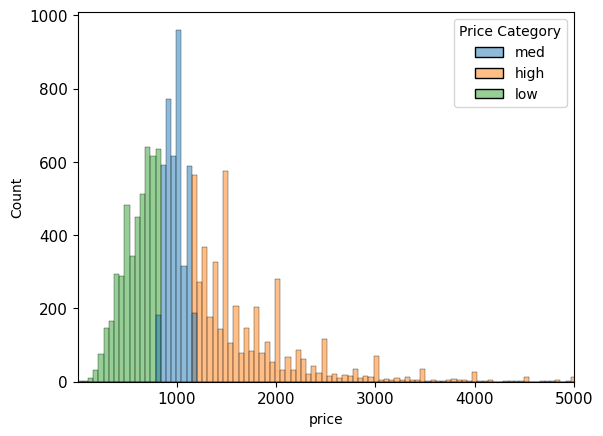

In [286]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="price", hue="Price Category")
ax.set_xlim(1,5000)
plt.show()

In [287]:

X_Data=df2[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
Y_Data=df2['high']
x_train, x_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=.33, random_state=123, shuffle=True)

## Binary classifiacation problem
In this section we will build an evaluate a logistic regression, support vector and random forest classifier.


Regression classifier:

In [288]:
def build_log_reg_classifiers( x_train, y_train, x_test, y_test):
    LogReg=LogisticRegression(max_iter=100000)
    LogReg.fit(x_train, y_train)
    LogReg.score(x_test,y_test)
    y_pred=LogReg.predict(x_test)
    return LogReg, y_pred

-----Logistic regression-----
F1 score:  0.6809421841541755
Accuracy:  0.6706454465075155


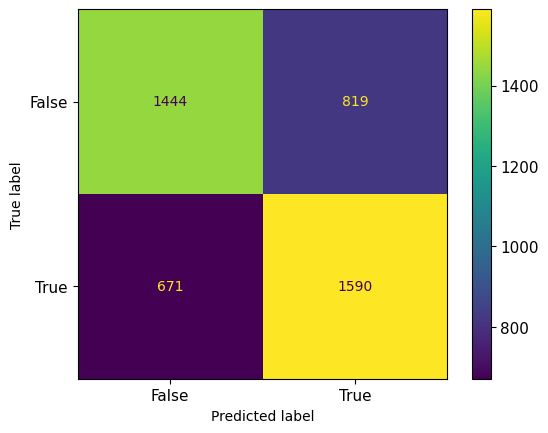

In [289]:
model, y_pred= build_log_reg_classifiers(x_train, y_train, x_test, y_test)
plot_confusion_matrix(model, x_test, y_test)  
print("-----Logistic regression-----")
print('F1 score: ',f1_score(y_test,y_pred))
print('Accuracy: ',model.score(x_test,y_test))

Support vector classifier:

-----SVC-----
F1 score:  0.7051856594110115
Accuracy:  0.5928381962864722


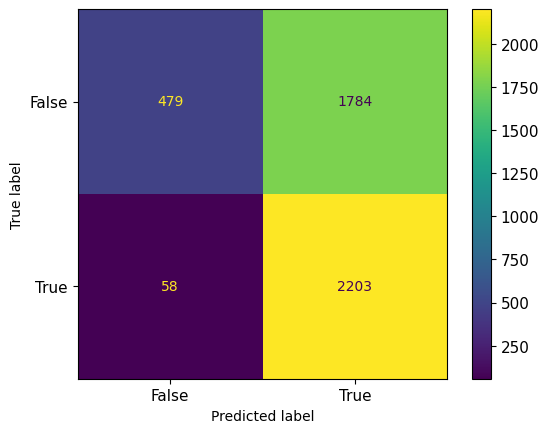

In [290]:

from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)
y_pred=sv.predict(x_test)

#Evauluating the results
plot_confusion_matrix(sv, x_test, y_test)
print("-----SVC-----")
print('F1 score: ',f1_score(y_test,y_pred))
print('Accuracy: ',sv.score(x_test,y_test))




Random Forest Classifier (RFC):

-----Random Forest Classifier-----
F1 score:  0.7122745270567531
Accuracy:  0.7108753315649867


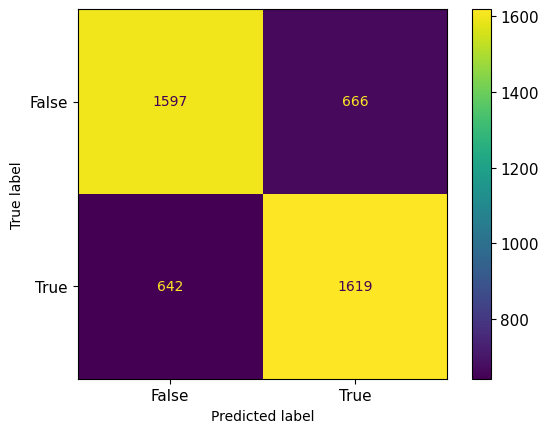

In [291]:
from sklearn.ensemble import RandomForestClassifier
Rnd_forest=RandomForestClassifier()
Rnd_forest.fit(x_train,y_train)
Rnd_forest.score(x_test,y_test)
y_pred=Rnd_forest.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Rnd_forest, x_test, y_test)
print("-----Random Forest Classifier-----")
print('F1 score: ',f1_score(y_test,y_pred))
print('Accuracy: ',Rnd_forest.score(x_test,y_test))


When we compare the results from our classifiers we see that the Random Forest Classifier gives the best accuracy of around 0.70. The accuracy is a valid evauluation metric, as the dataset is balanced, meaning it is approximately evenly split in half. The classifier also satisfies the benchmark of a f1 score > 0.6. 

## Multi class classification problem
For out multiclass problem, we will build and evaluate four different classifiers.


In [292]:
Y_Data=df2['Price Category']
x_train, x_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=.33, random_state=123, shuffle=True)

Logistic regression classifier:

the accuracy score is 0.5159151193633952
The weigted F1 score : 0.5155905604551212


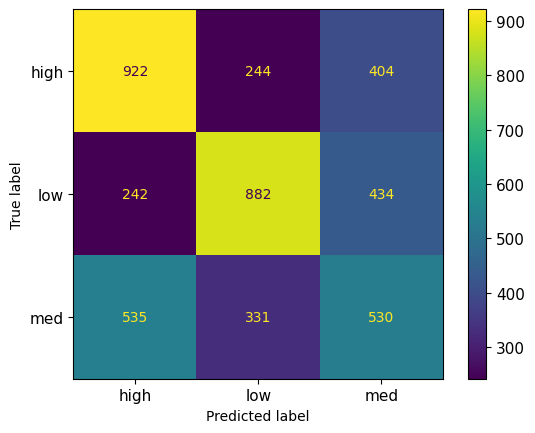

In [293]:

MultiLogReg=LogisticRegression(max_iter=100000)
MultiLogReg.fit(x_train, y_train)
MultiLogReg.score(x_test,y_test)

#Evaluation the result
y_multi_pred=MultiLogReg.predict(x_test)
plot_confusion_matrix(MultiLogReg, x_test, y_test)  
print('the accuracy score is',MultiLogReg.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'weighted')
print(f"The weigted F1 score : {weighted_f1}")



Random forest classifier:

-----Random Forest Classifier-----
Accuracy: 0.5477453580901857
The weigted F1 score: 0.5419235744339872


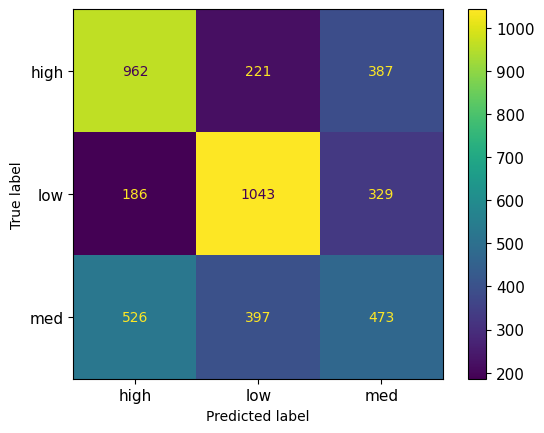

In [294]:

Multi_rnd_forest=RandomForestClassifier()
Multi_rnd_forest.fit(x_train,y_train)
Multi_rnd_forest_y_pred=Multi_rnd_forest.predict(x_test)

#Evauluating the results
print("-----Random Forest Classifier-----")
plot_confusion_matrix(Multi_rnd_forest, x_test, y_test)  
print('Accuracy:',Multi_rnd_forest.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, Multi_rnd_forest_y_pred, average = 'weighted')
print(f"The weigted F1 score: {weighted_f1}")


Support vector machine:
The input a tolerance parameter "C", also called a regularization parameter. C controls the amount of misclassifications that are allowed. 
The gamma parameter controls how much nearby points influence each other.
We test the differnt kernels to see which gives the optimal results:


In [295]:
from sklearn import svm, datasets
def buildSVM(kernelType, gammaValue, tolerationParameter):
    print(kernelType,gammaValue,tolerationParameter)
    Multi_sv=svm.SVC(kernel=kernelType, gamma=gammaValue, C=tolerationParameter).fit(x_train, y_train)
    Multi_sv.fit(x_train,y_train)
    Multi_sv.score(x_test,y_test)
    Multi_sv_y_pred=Multi_sv.predict(x_test)
    weighted_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'weighted')
    print('SVC with',kernelType,'kernel, has an accuracy of',Multi_sv.score(x_test,y_test),' and a weigted F1 score of',weighted_f1)



In [296]:
regParam=0.1
gamma=0.1
buildSVM('rbf',gamma,regParam)
buildSVM('sigmoid',gamma,regParam)
#buildSVM('poly',gamma,regParam) (This takes to much time)
buildSVM('linear',gamma,regParam)


rbf 0.1 0.1
SVC with rbf kernel, has an accuracy of 0.484526967285588  and a weigted F1 score of 0.47184916435635654
sigmoid 0.1 0.1
SVC with sigmoid kernel, has an accuracy of 0.34703801945181256  and a weigted F1 score of 0.1788151265307994
linear 0.1 0.1
SVC with linear kernel, has an accuracy of 0.4858532272325376  and a weigted F1 score of 0.46174878445457795


We use the optimal SVM with a polynomial kernel, a regularization parameter C=0.1 and a gamma=0.1

-----Support Vector Machine-----
SVM accuracy is 0.484526967285588
Weigted F1 score : 0.47184916435635654


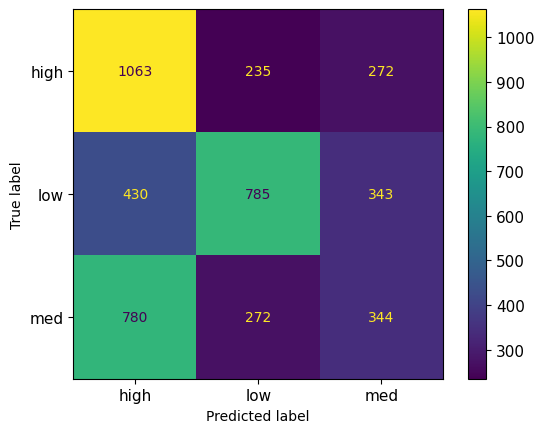

In [297]:
from sklearn import svm, datasets
Multi_sv=svm.SVC(kernel='rbf',gamma=0.1, C=0.1).fit(x_train, y_train)
Multi_sv.fit(x_train,y_train)
Multi_sv.score(x_test,y_test)
Multi_sv_y_pred=Multi_sv.predict(x_test)

#Evauluating the results
print("-----Support Vector Machine-----")
plot_confusion_matrix(Multi_sv, x_test, y_test)  
print('SVM accuracy is',Multi_sv.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'weighted')
print(f"Weigted F1 score : {weighted_f1}")


-----Decision Tree Classifier-----
Accuracy is 0.48143236074270557
Weigted F1 score : 0.4802918094989782


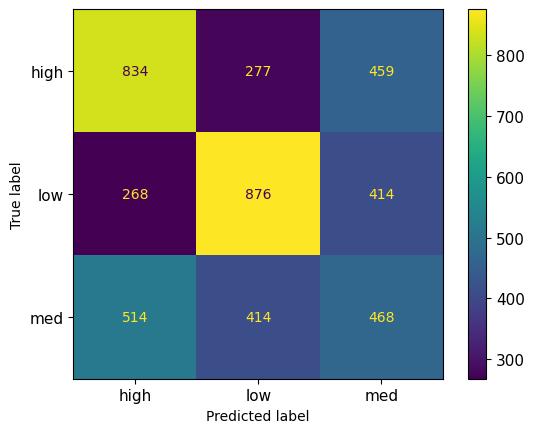

In [298]:
from sklearn.tree import DecisionTreeClassifier
my_tree=DecisionTreeClassifier()
my_tree.fit(x_train,y_train)
my_tree.score(x_test,y_test)
my_tree_y_pred=my_tree.predict(x_test)

#Evauluating the results
print("-----Decision Tree Classifier-----")
plot_confusion_matrix(my_tree, x_test, y_test)  
print('Accuracy is',my_tree.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, my_tree_y_pred, average = 'weighted')
print(f"Weigted F1 score : {weighted_f1}")

The Random forest classifier (RFC) gives the highest accuracy of 0.53. It also provides a better weighted F1 score for all the other classifiers. Because of our balanced data set, the acccuracy may be the most intuitive and most precise performance indicator. We can compare our results with a baseline. We can calcuate this baseline by predicting that all of the observations fall within the category with most observations in the trainingset. The baseline will have an accuracy of approximately 0.35. 
Our RFC provides us with an 18% higher accuracy than the baseline.

We can also observe that the RFC predict observations with price category "high" most accurate, with 947 correct predictions. This is probably due to the wide range of prices that "high" includes.

#### Word count
From: https://stackoverflow.com/questions/71194571/word-count-of-markdown-cells-in-jupyter-notebook

In [5]:
import json

with open('part1.ipynb', encoding='utf-8') as json_file:
    data = json.load(json_file)

In [6]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

1247
